In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import random
import importlib
import mpt_functions as mpt
importlib.reload(mpt)

<module 'mpt_functions' from 'd:\\Code\\GradProject-Bilge\\mpt_functions.py'>

In [127]:
path = "C:/Users/bilge/Downloads/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)
df = mpt.drop_a_column(df, "Unnamed: 0")
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [128]:
df_day1 = mpt.filter_a_day("2020-06-05",df)
df_day1

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-06-05 00:00:02,-0.012,8.844,8.828,-0.022,8.844,60.300,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-06-05 00:00:12,-0.014,8.830,8.816,-0.022,8.830,60.225,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-06-05 00:00:22,-0.012,8.816,8.804,-0.022,8.818,60.000,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-06-05 00:00:32,-0.012,8.804,8.788,-0.022,8.804,60.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-06-05 00:00:42,-0.012,8.790,8.776,-0.022,8.792,60.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8711,2020-06-05 23:59:10,8.364,8.156,-0.008,2.218,8.158,75.700,5.6775,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
8712,2020-06-05 23:59:20,8.386,8.166,-0.008,2.232,8.168,75.650,5.6575,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
8713,2020-06-05 23:59:30,8.388,8.178,-0.008,2.232,8.178,75.500,5.5825,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
8714,2020-06-05 23:59:40,8.394,8.186,-0.008,2.238,8.188,75.500,5.5125,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [129]:
df_day1 = mpt.aggregate_as_a_minute(df_day1)
df_day1

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-06-05 00:00:00,-0.012333,8.810000,8.795667,-0.022000,8.810667,60.104167,0.042500,1.0,0.0,1.000000,1.0,0.0,1.0,1.0,1.0
1,2020-06-05 00:01:00,-0.013000,8.730667,8.719333,-0.023000,8.732000,59.729167,0.042500,1.0,0.0,1.000000,1.0,0.0,1.0,1.0,1.0
2,2020-06-05 00:02:00,-0.013333,8.655000,8.642333,-0.021667,8.656333,59.316667,0.042917,1.0,0.0,1.000000,1.0,0.0,1.0,1.0,1.0
3,2020-06-05 00:03:00,-0.012667,8.580000,8.567667,-0.022333,8.581000,59.004167,0.042917,1.0,0.0,1.000000,1.0,0.0,1.0,1.0,1.0
4,2020-06-05 00:04:00,-0.013143,8.499429,8.488000,-0.022286,8.500000,58.610714,0.042500,1.0,0.0,1.000000,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2020-06-05 23:55:00,8.247667,8.173667,-0.008000,2.185000,8.173667,75.629167,5.580417,0.0,1.0,0.833333,0.0,0.0,1.0,1.0,1.0
1436,2020-06-05 23:56:00,7.750333,8.172333,-0.008667,2.018333,8.173333,75.558333,5.466667,0.0,1.0,0.166667,0.0,0.0,1.0,1.0,1.0
1437,2020-06-05 23:57:00,7.882333,8.173667,-0.009000,2.072667,8.175000,75.604167,5.500000,0.0,1.0,0.833333,0.0,0.0,1.0,1.0,1.0
1438,2020-06-05 23:58:00,7.773333,8.172667,-0.008333,2.025000,8.172667,75.575000,5.453333,0.0,1.0,0.166667,0.0,0.0,1.0,1.0,1.0


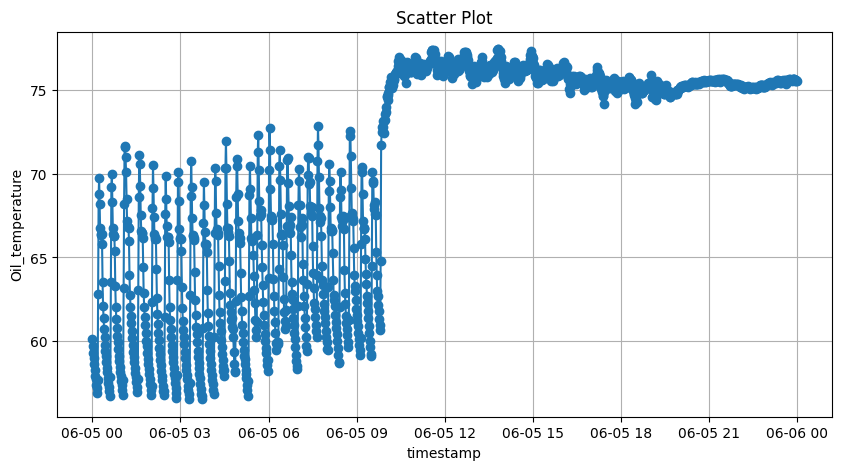

In [130]:
mpt.plot_columns(df_day1,"timestamp", "Oil_temperature")

In [131]:
df_oil_temp = df_day1[["timestamp",'Oil_temperature']]
df_oil_temp.head()

,timestamp,Oil_temperature
0,2020-06-05 00:00:00,60.104167
1,2020-06-05 00:01:00,59.729167
2,2020-06-05 00:02:00,59.316667
3,2020-06-05 00:03:00,59.004167
4,2020-06-05 00:04:00,58.610714


In [132]:
print(df_oil_temp['Oil_temperature'].isna().sum())  # Count NaN values
print((df_oil_temp['Oil_temperature'] == float('inf')).sum())  # Count positive infinity
print((df_oil_temp['Oil_temperature'] == float('-inf')).sum())  # Count negative infinity

0
0
0


In [133]:
# Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(df_oil_temp['Oil_temperature'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing needed.")
    df_oil_temp['Oil_temperature'] = df_oil_temp['Oil_temperature'].diff().dropna()

ADF Statistic: -1.1982566254578964
p-value: 0.6743452176419061
Data is non-stationary. Differencing needed.


C:\Users\bilge\AppData\Local\Temp\ipykernel_10896\2416481252.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_temp['Oil_temperature'] = df_oil_temp['Oil_temperature'].diff().dropna()


In [134]:
df_oil_temp.head()

,timestamp,Oil_temperature
0,2020-06-05 00:00:00,NaN
1,2020-06-05 00:01:00,-0.375000
2,2020-06-05 00:02:00,-0.412500
3,2020-06-05 00:03:00,-0.312500
4,2020-06-05 00:04:00,-0.393452


In [135]:
print(df_oil_temp.columns)

Index(['timestamp', 'Oil_temperature'], dtype='object')


In [136]:
df_oil_temp.shape

(1440, 2)

In [137]:
df_oil_temp = df_oil_temp.dropna(subset=['Oil_temperature'])
df_oil_temp.head()

,timestamp,Oil_temperature
1,2020-06-05 00:01:00,-0.375000
2,2020-06-05 00:02:00,-0.412500
3,2020-06-05 00:03:00,-0.312500
4,2020-06-05 00:04:00,-0.393452
5,2020-06-05 00:05:00,-0.356548


In [138]:
forecast_hour_start = pd.Timestamp("2020-06-05 09:00:00")  # Start of the hour
forecast_hour_end = pd.Timestamp("2020-06-05 15:00:00")    # End of the hour

df_hour = df_oil_temp[(df_oil_temp["timestamp"] >= forecast_hour_start) & (df_oil_temp["timestamp"] < forecast_hour_end)]

print("Hourly Data Shape:", df_hour.shape)
print(df_hour.head(12))

Hourly Data Shape: (360, 2)
              timestamp  Oil_temperature
540 2020-06-05 09:00:00        -0.375000
541 2020-06-05 09:01:00        -0.362500
542 2020-06-05 09:02:00        -0.312500
543 2020-06-05 09:03:00        -0.400000
544 2020-06-05 09:04:00        -0.345833
545 2020-06-05 09:05:00        -0.341667
546 2020-06-05 09:06:00        -0.308333
547 2020-06-05 09:07:00        -0.300000
548 2020-06-05 09:08:00         1.004167
549 2020-06-05 09:09:00         5.625000
550 2020-06-05 09:10:00         4.291667
551 2020-06-05 09:11:00         0.279167


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


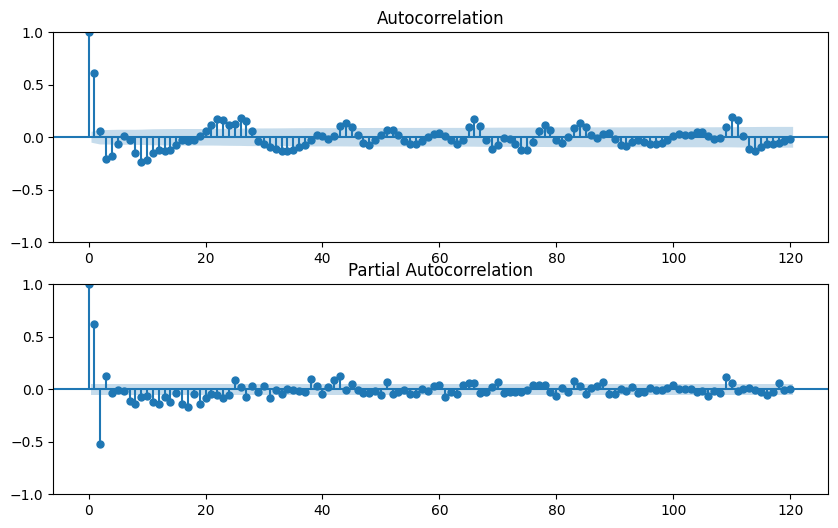

In [139]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
plot_acf(df_oil_temp["Oil_temperature"], lags=120, ax=ax[0])  # Shows MA(q)
plot_pacf(df_oil_temp["Oil_temperature"], lags=120, ax=ax[1]) # Shows AR(p)
plt.show()

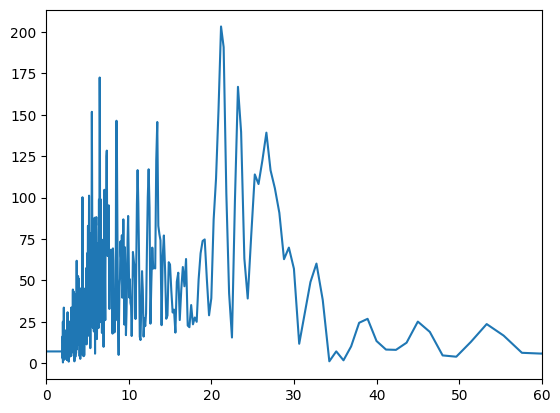

In [140]:
import numpy as np

fft_vals = np.fft.fft(df_oil_temp['Oil_temperature'])
freqs = np.fft.fftfreq(len(fft_vals))

# Avoid division by zero by filtering out zero frequency
nonzero_freqs = freqs[freqs != 0]
nonzero_fft_vals = fft_vals[freqs != 0]

plt.plot(1 / nonzero_freqs, abs(nonzero_fft_vals))  # Period vs. Magnitude
plt.xlim(0, 60)  # Adjust for relevant periods
plt.show()


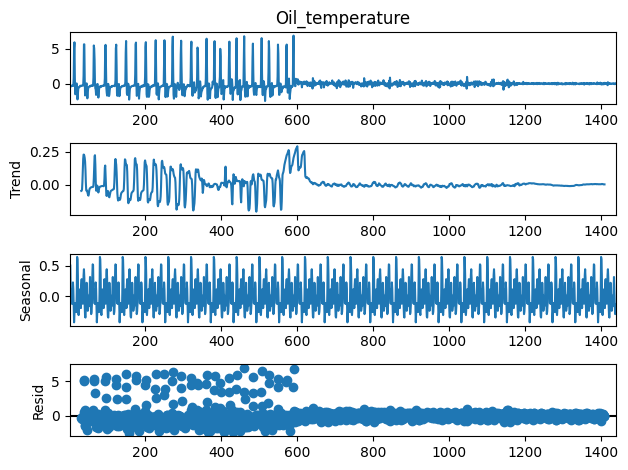

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_oil_temp['Oil_temperature'], period=60, model='additive')  
result.plot()
plt.show()

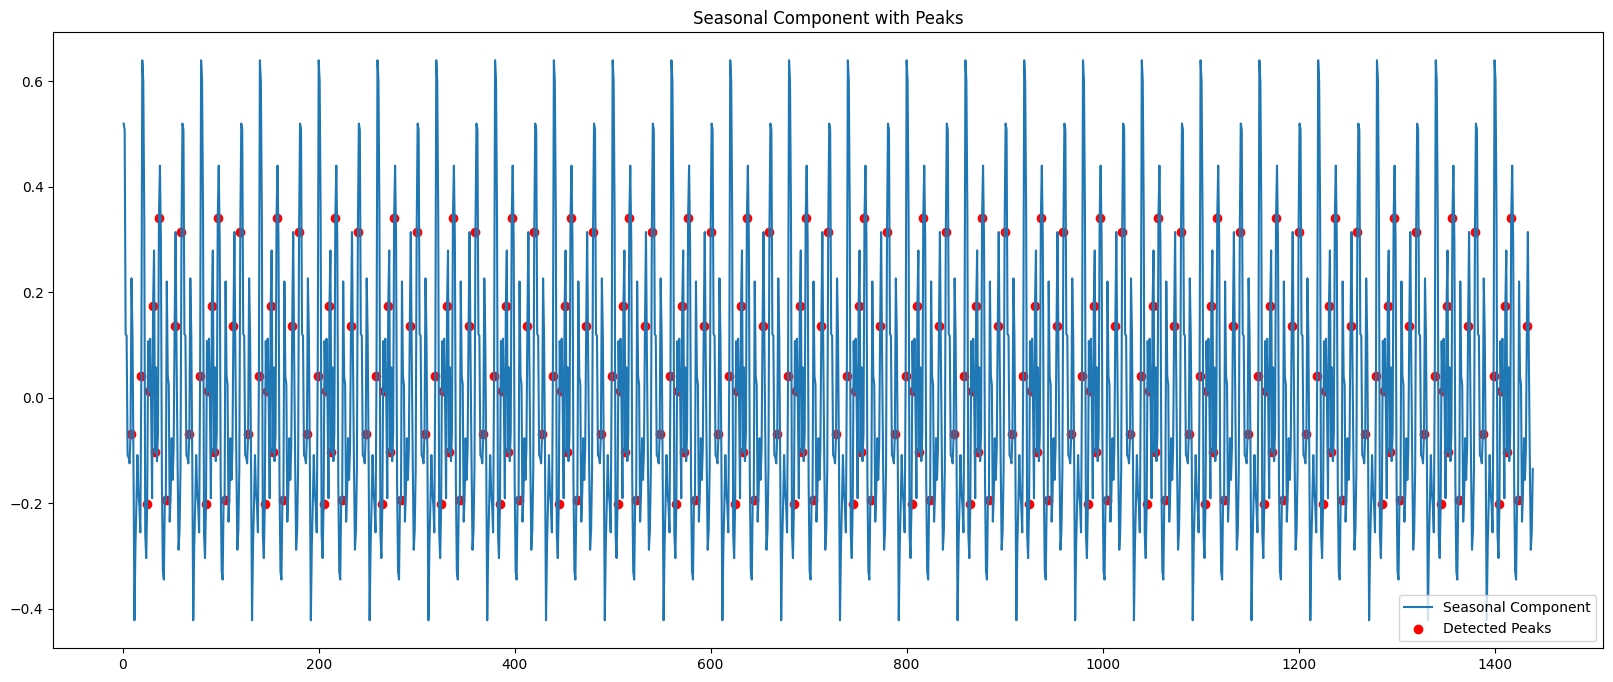

Detected peak positions: [   8   19   25   27   31   33   37   44   53   60   68   79   85   87
   91   93   97  104  113  120  128  139  145  147  151  153  157  164
  173  180  188  199  205  207  211  213  217  224  233  240  248  259
  265  267  271  273  277  284  293  300  308  319  325  327  331  333
  337  344  353  360  368  379  385  387  391  393  397  404  413  420
  428  439  445  447  451  453  457  464  473  480  488  499  505  507
  511  513  517  524  533  540  548  559  565  567  571  573  577  584
  593  600  608  619  625  627  631  633  637  644  653  660  668  679
  685  687  691  693  697  704  713  720  728  739  745  747  751  753
  757  764  773  780  788  799  805  807  811  813  817  824  833  840
  848  859  865  867  871  873  877  884  893  900  908  919  925  927
  931  933  937  944  953  960  968  979  985  987  991  993  997 1004
 1013 1020 1028 1039 1045 1047 1051 1053 1057 1064 1073 1080 1088 1099
 1105 1107 1111 1113 1117 1124 1133 1140 1148 1159 1

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df_oil_temp['Oil_temperature'], period=60)  # Use s=60 as a starting point
seasonal = result.seasonal

# Detect peaks in the seasonal component
peaks, _ = find_peaks(seasonal, height=0)  # Detects local maxima

# Plot the seasonal component with detected peaks
plt.figure(figsize=(20, 8))
plt.plot(seasonal, label="Seasonal Component")
plt.scatter(peaks, seasonal[peaks], color='red', label="Detected Peaks")
plt.legend()
plt.title("Seasonal Component with Peaks")
plt.show()

# Print detected peak indices
print("Detected peak positions:", peaks)

In [143]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_oil_temp['Oil_temperature'], regression='c')  # 'c' for constant, 'ct' for trend
print(f"KPSS Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")

KPSS Test Statistic: 0.01363482244049546
p-value: 0.1


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [144]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example)
model = ARIMA(df_hour['Oil_temperature'], order=(2, 0, 2))  # Replace with your target column
model_fit = model.fit()

# Forecast the next 10 minutes
forecast = model_fit.forecast(steps=10)
print("Forecast for the next 10 minutes:", forecast)

d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecast for the next 10 minutes: 360   -0.053058
361    0.019701
362    0.045090
363    0.051893
364    0.051961
365    0.050009
366    0.047800
367    0.045902
368    0.044432
369    0.043347
Name: predicted_mean, dtype: float64


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [145]:
from pmdarima import auto_arima
auto_arima(df_hour['Oil_temperature']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  360
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -353.716
Date:                Sun, 23 Mar 2025   AIC                            719.431
Time:                        20:26:14   BIC                            742.748
Sample:                             0   HQIC                           728.702
                                - 360                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0072      0.008      0.892      0.372      -0.009       0.023
ar.L1          1.1220      0.055     20.492      0.000       1.015       1.229
ar.L2         -0.2980      0.056     -5.361      0.000      -0.407      -0.189
ma.L1         -0.5323      0.063     -8.503      0.000      -0.655      -0.410
ma.L2         -0.3381      0.072     -4.681      0.000      -0.480      -0.197
sigma2         0.4170      0.017     24.282      0.000       0.383       0.451
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9984.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             3.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
model = auto_arima(df_oil_temp['Oil_temperature'], seasonal=False, stepwise=False, max_p=5, max_q=5)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1439
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -1651.875
Date:                Sun, 23 Mar 2025   AIC                           3315.750
Time:                        20:26:18   BIC                           3347.380
Sample:                             0   HQIC                          3327.558
                               - 1439                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9006      0.019    101.697      0.000       1.864       1.937
ar.L2         -1.5833      0.031    -50.372      0.000      -1.645      -1.522
ar.L3          0.7869      0.040     19.649      0.000       0.708       0.865
ar.L4         -0.2131      0.025     -8.514      0.000      -0.262      -0.164
ma.L1         -0.9637      0.012    -77.222      0.000      -0.988      -0.939
sigma2         0.5807      0.012     47.014      0.000       0.556       0.605
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              9208.94
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             2.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
auto_arima(df_oil_temp['Oil_temperature']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1439
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1708.112
Date:                Sun, 23 Mar 2025   AIC                           3424.224
Time:                        20:26:22   BIC                           3445.310
Sample:                             0   HQIC                          3432.096
                               - 1439                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7615      0.038     19.911      0.000       0.687       0.836
ar.L2         -0.4084      0.032    -12.745      0.000      -0.471      -0.346
ma.L1          0.2397      0.043      5.517      0.000       0.155       0.325
sigma2         0.6284      0.009     72.288      0.000       0.611       0.645
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12840.27
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             2.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

            Model          AIC          BIC      RMSE
0  SARIMAX(1,0,3)  2926.904063  2952.128588  0.093250
4  SARIMAX(2,0,1)  2981.521976  3001.708565  0.096271
3  SARIMAX(2,0,2)  2981.925287  3007.154170  0.096266
5  SARIMAX(4,1,1)  2987.457758  3017.721956  0.096488
1  SARIMAX(1,0,2)  3013.893493  3034.076600  0.095653
2  SARIMAX(1,0,1)  3059.665426  3074.805368  0.095222


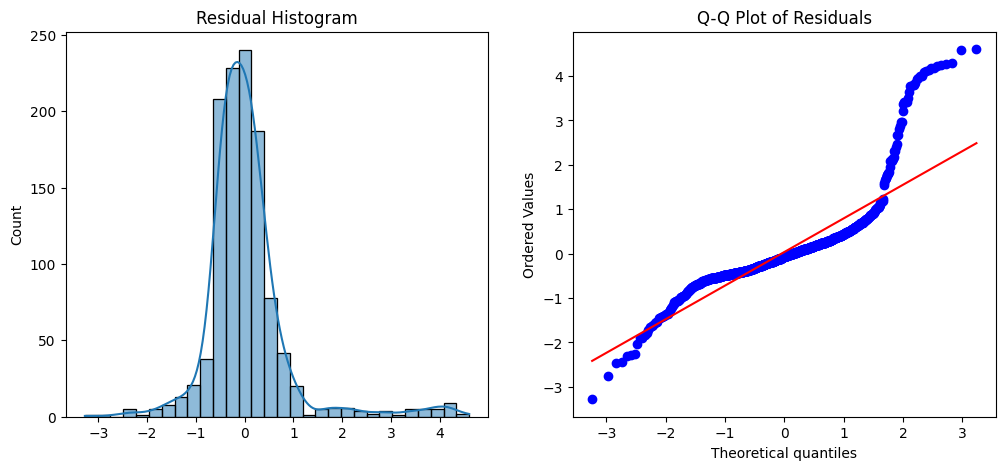

d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


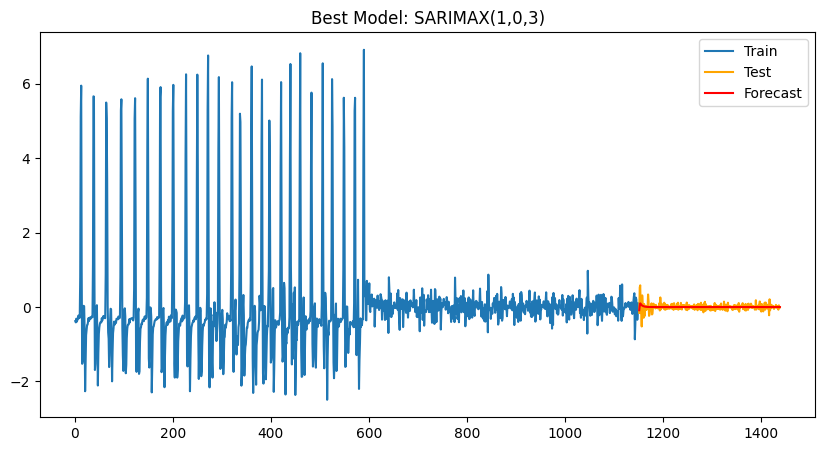

In [148]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Load data
y = df_oil_temp['Oil_temperature']

# Train-test split (80% train, 20% test)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Define SARIMAX models
models = {
    "SARIMAX(1,0,3)": sm.tsa.SARIMAX(train, order=(1,0,3), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(1,0,2)": sm.tsa.SARIMAX(train, order=(1,0,2), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(1,0,1)": sm.tsa.SARIMAX(train, order=(1,0,1), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(2,0,2)": sm.tsa.SARIMAX(train, order=(2,0,2), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(2,0,1)": sm.tsa.SARIMAX(train, order=(2,0,1), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(4,1,1)": sm.tsa.SARIMAX(train, order=(4,1,1), enforce_stationarity=False, enforce_invertibility=False)
}

# Fit models
results = {name: model.fit(disp=False) for name, model in models.items()}

# Forecast on test set and evaluate RMSE
rmse_results = {}
for name, res in results.items():
    forecast = res.forecast(steps=len(test))
    rmse_results[name] = np.sqrt(mean_squared_error(test, forecast))

# Compare AIC, BIC, and RMSE
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "AIC": [res.aic for res in results.values()],
    "BIC": [res.bic for res in results.values()],
    "RMSE": rmse_results.values()
}).sort_values(by="AIC")

print(comparison_df)

# Choose best model based on lowest AIC
best_model_name = comparison_df.iloc[0]["Model"]
best_model = results[best_model_name]

# Residual diagnostics for best model
residuals = best_model.resid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Residual Histogram")
probplot(residuals, plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")
plt.show()

# Forecast visualization
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='orange')
plt.plot(test.index, best_model.forecast(steps=len(test)), label="Forecast", color='red')
plt.legend()
plt.title(f"Best Model: {best_model_name}")
plt.show()


In [149]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Load data
y = df_oil_temp['Oil_temperature']

# Train-test split (80% train, 20% test)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Define SARIMAX models
models = {
    "SARIMAX(1,0,3)": sm.tsa.SARIMAX(train, order=(1,0,3), seasonal_order=(1,1,1,60), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(1,0,1)": sm.tsa.SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,60), enforce_stationarity=False, enforce_invertibility=False),
}

# Fit models
results = {name: model.fit(disp=False) for name, model in models.items()}

# Forecast on test set and evaluate RMSE
rmse_results = {}
for name, res in results.items():
    forecast = res.forecast(steps=len(test))
    rmse_results[name] = np.sqrt(mean_squared_error(test, forecast))

# Compare AIC, BIC, and RMSE
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "AIC": [res.aic for res in results.values()],
    "BIC": [res.bic for res in results.values()],
    "RMSE": rmse_results.values()
}).sort_values(by="AIC")

print(comparison_df)

# Choose best model based on lowest AIC
best_model_name = comparison_df.iloc[0]["Model"]
best_model = results[best_model_name]

# Residual diagnostics for best model
residuals = best_model.resid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Residual Histogram")
probplot(residuals, plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")
plt.show()

# Forecast visualization
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='orange')
plt.plot(test.index, best_model.forecast(steps=len(test)), label="Forecast", color='red')
plt.legend()
plt.title(f"Best Model: {best_model_name}")
plt.show()


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

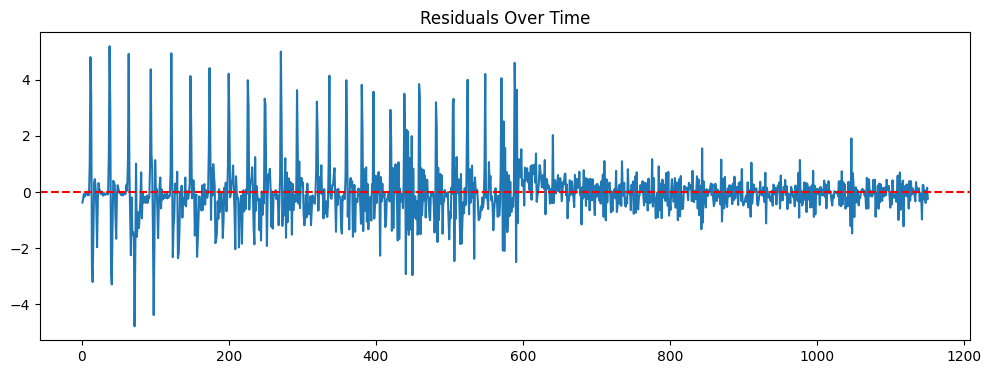

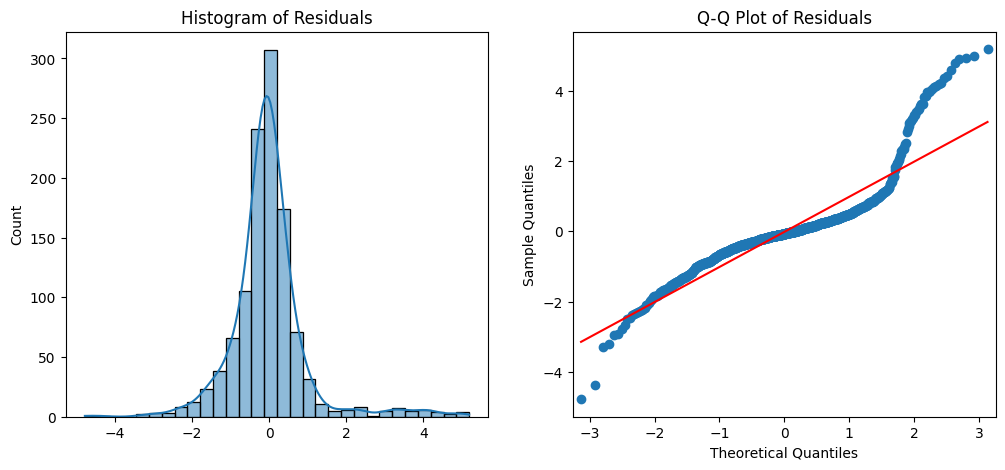

ADF Test p-value: 0.0000 (Stationary if < 0.05)


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


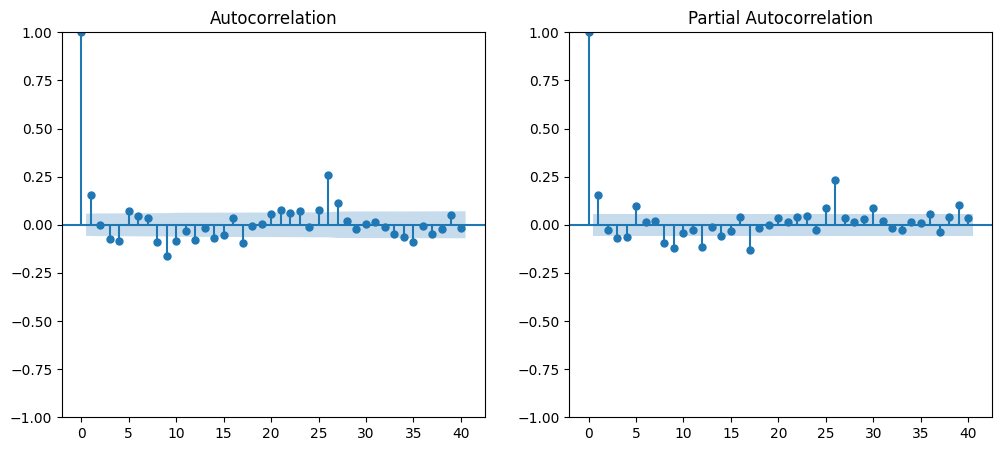

Ljung-Box Test p-value: 0.0000 (Residuals are white noise if > 0.05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# Get residuals from the best model (SARIMAX(1,0,3))
residuals = best_model.resid  # Replace with your actual fitted model

# 1️⃣ Residuals Plot
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Over Time")
plt.show()

# 2️⃣ Histogram & Q-Q Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
ax[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title("Q-Q Plot of Residuals")

plt.show()

# 3️⃣ Augmented Dickey-Fuller Test (Stationarity)
adf_p_value = adfuller(residuals)[1]
print(f"ADF Test p-value: {adf_p_value:.4f} (Stationary if < 0.05)")

# 4️⃣ Autocorrelation (ACF & Ljung-Box)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

# 5️⃣ Ljung-Box Test (White Noise Check)
ljung_box_pvals = acorr_ljungbox(residuals, lags=[10], return_df=True)["lb_pvalue"].values[0]
print(f"Ljung-Box Test p-value: {ljung_box_pvals:.4f} (Residuals are white noise if > 0.05)")
